## **Import required libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


## **Load Dataset**

In [2]:
df = pd.read_csv('customer_clean_transactions.csv')

df['Revenue'] = df['Quantity'] * df['Price']

print(df['Country'].nunique())
print(df['Country'].unique())


41
['United Kingdom' 'France' 'USA' 'Belgium' 'Australia' 'EIRE' 'Germany'
 'Portugal' 'Denmark' 'Netherlands' 'Poland' 'Channel Islands' 'Spain'
 'Cyprus' 'Greece' 'Norway' 'Austria' 'Sweden' 'United Arab Emirates'
 'Finland' 'Italy' 'Switzerland' 'Japan' 'Unspecified' 'Nigeria' 'Malta'
 'RSA' 'Singapore' 'Bahrain' 'Thailand' 'Israel' 'Lithuania' 'West Indies'
 'Korea' 'Brazil' 'Canada' 'Iceland' 'Lebanon' 'Saudi Arabia'
 'Czech Republic' 'European Community']


## **Total Revenue by Country**

In [3]:
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).reset_index()

print("Top Countries by Revenue:")
print(country_revenue.head(10))


Top Countries by Revenue:
          Country       Revenue
0  United Kingdom  1.434328e+07
1            EIRE  6.153291e+05
2     Netherlands  5.425043e+05
3         Germany  4.240412e+05
4          France  3.504732e+05
5       Australia  1.699681e+05
6           Spain  1.088623e+05
7     Switzerland  1.003653e+05
8          Sweden  9.131172e+04
9         Denmark  6.969329e+04


## **Total Orders by Country**

In [4]:
orders_by_country = df.groupby('Country')['Invoice'].nunique().sort_values(ascending=False).reset_index()

orders_by_country.columns = ['Country', 'TotalOrders']

print("Top Countries by Orders:")
print(orders_by_country.head(10))


Top Countries by Orders:
          Country  TotalOrders
0  United Kingdom        33085
1         Germany          775
2          France          601
3            EIRE          560
4     Netherlands          225
5           Spain          152
6         Belgium          146
7          Sweden          103
8       Australia           95
9     Switzerland           90


## **Average Order Value by Country**

In [5]:
merged = pd.merge(country_revenue, orders_by_country, on='Country')

merged['AvgOrderValue'] = (merged['Revenue'] / merged['TotalOrders']).round(2)

aov_sorted = merged.sort_values('AvgOrderValue', ascending=False)

print("Countries with Highest Avg Order Value:")
print(aov_sorted.head(10))


Countries with Highest Avg Order Value:
        Country    Revenue  TotalOrders  AvgOrderValue
2   Netherlands  542504.32          225        2411.13
17    Singapore   25317.06           11        2301.55
5     Australia  169968.11           95        1789.14
32      Lebanon    1693.88            1        1693.88
9       Denmark   69693.29           42        1659.36
30     Thailand    3070.54            2        1535.27
22       Israel   10421.09            7        1488.73
13        Japan   47138.39           33        1428.44
11       Norway   57323.92           42        1364.86
7   Switzerland  100365.34           90        1115.17


## **Plot Top Countries by Revenue**

/tmp/ipython-input-6-2744810341.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='Country', data=top_countries, palette='coolwarm')


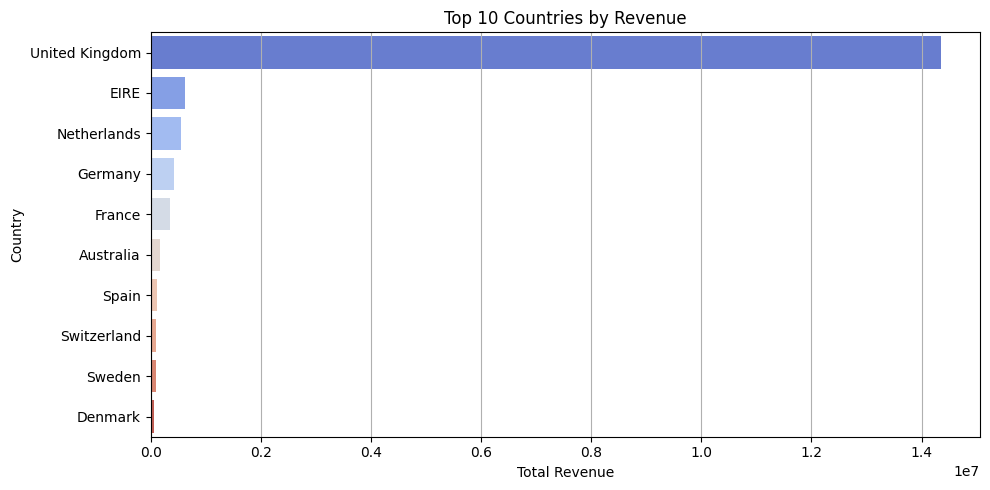

In [6]:
top_countries = country_revenue.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x='Revenue', y='Country', data=top_countries, palette='coolwarm')
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


## **Plot on World Map**

In [7]:
fig = px.choropleth(
    country_revenue,
    locations='Country',
    locationmode='country names',
    color='Revenue',
    title='Revenue by Country',
    color_continuous_scale='Blues')
fig.show()